In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import random
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv("data/dataset1.txt")

display(df.head())
print(df.shape)

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


(10000, 3)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB
None


In [7]:
print(df.isnull().sum())
df.duplicated().sum()

x        0
y        0
class    0
dtype: int64


0

In [8]:
df.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


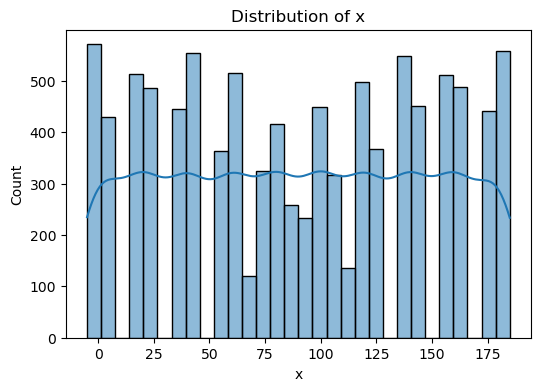

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


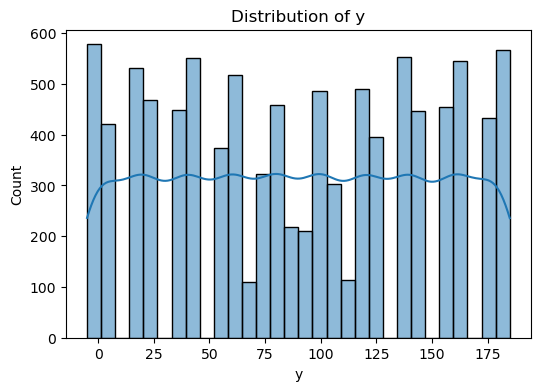

In [9]:
for col in df.columns:
    if col == "class":
        continue
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

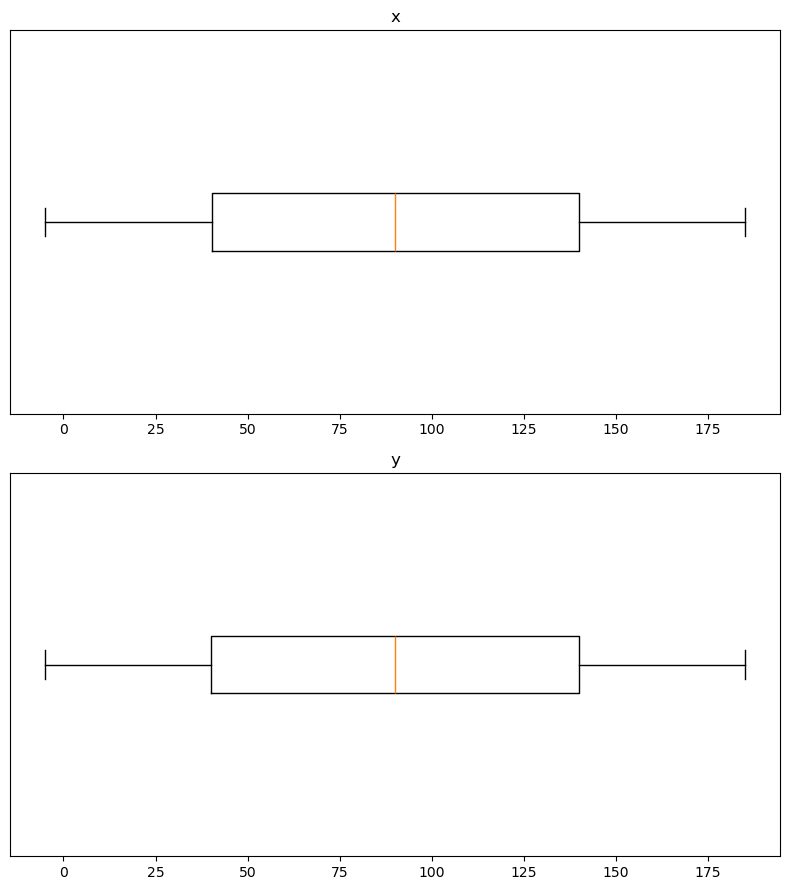

In [10]:
fig, axs = plt.subplots(len(df.columns)-1, 1, figsize=(8, 3*len(df.columns)), dpi=100)

if len(df.columns) == 1:
    axs = [axs]

for i, col in enumerate(df.columns):
    if col=="class":
        continue
    axs[i].boxplot(df[col].dropna(), vert=False)
    axs[i].set_title(col)   
    axs[i].set_yticks([]) 

plt.tight_layout()
plt.show()

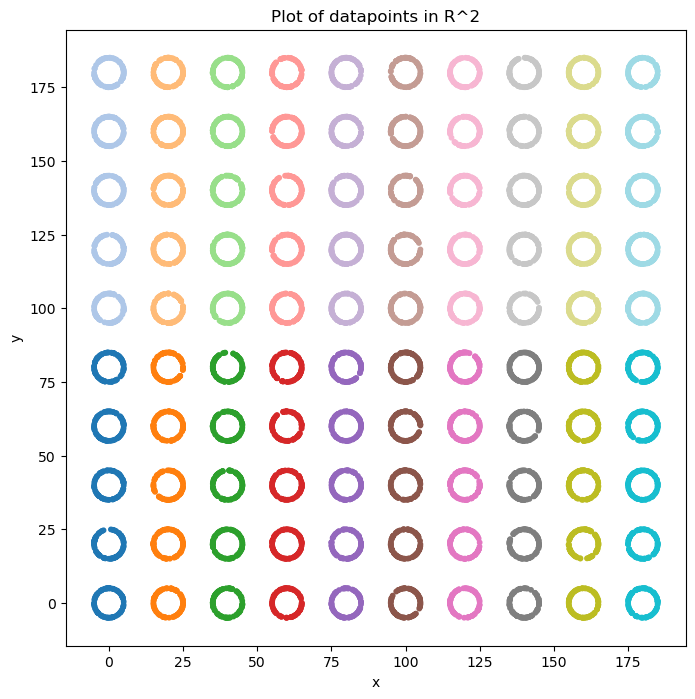

In [11]:
plt.figure(figsize = (8,8))
plt.scatter(df["x"], df["y"],c=df['class'], cmap="tab20", s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of datapoints in R^2")
plt.show()

In [12]:
X = df[["x", "y"]].copy()
y = df['class'].copy()

In [13]:
def standardize(col):
    mu = X[col].mean()
    sigma = X[col].std()
    X.loc[:, col] = (X[col] - mu)/sigma

for col in X.columns:
    standardize(col)

display(X.head())

,x,y
0,-1.511116,0.453767
1,-1.285078,-1.271501
2,0.179793,-0.434567
3,-1.589339,-0.090100
4,0.250474,-0.479156


In [14]:
def norm(p1, p2):
    return sqrt((p2['x']-p1['x'])^2 + (p2['y']-p1['y'])^2)

In [15]:
def k_means(df, k, max_iter= 20, tol=1e-5):
    #Step 1: Initialize all the centroids
    centers = df.sample(n=k).to_numpy()
    obj_func = []
  
    for iteration in range(max_iter):
        clusters = [[] for _ in range(k)]
        
        #Step 2: Add points to nearest centroid cluster
        for i, row in df.iterrows():
            distances = [np.linalg.norm(row.values - c) for c in centers]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(row.values)
            
        #Calculate and store Within Cluster Sum of Squared Dist. to plot later
        J=0
        for cluster_idx, cluster in enumerate(clusters):
            for point in cluster:
                J += np.linalg.norm(point - centers[cluster_idx])**2
        obj_func.append(J)
        
            
        #Step 3: Recalculate the new cluster centroids and repeat until convergence
        new_centers = []
        for cluster in clusters:
            if cluster:
                new_centers.append(np.mean(cluster, axis=0))
            else:
                new_centers.append(df.sample(n=1).to_numpy()[0])
        new_centers = np.array(new_centers)

        shift = np.linalg.norm(new_centers-centers)
        
        if shift<tol:
            break
        centers = new_centers

    X = df.to_numpy()
    dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
    labels = dists.argmin(axis = 1)

    return centers, labels, obj_func

3319603.2570639728


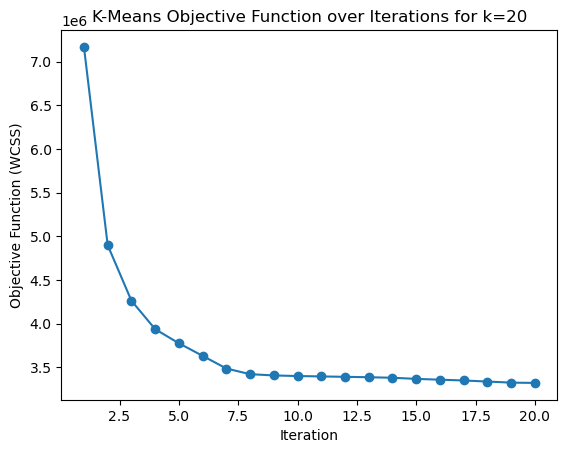

In [16]:
k = 20
centers, labels, objectives = k_means(df[['x','y']], k=k)
print(objectives[-1])

plt.plot(range(1, len(objectives)+1), objectives, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function (WCSS)")
plt.title(f"K-Means Objective Function over Iterations for k={k}")
plt.show()

In [25]:
inertias = []
for k in range(1, 200):
    centers, labels, objectives = k_means(df[['x','y']], k=k)
    inertias.append(objectives[-1])
    print(f"Inertia done for k={k}")

Inertia done for k=1
Inertia done for k=2
Inertia done for k=3
Inertia done for k=4
Inertia done for k=5
Inertia done for k=6
Inertia done for k=7
Inertia done for k=8
Inertia done for k=9
Inertia done for k=10
Inertia done for k=11
Inertia done for k=12
Inertia done for k=13
Inertia done for k=14
Inertia done for k=15
Inertia done for k=16
Inertia done for k=17
Inertia done for k=18
Inertia done for k=19
Inertia done for k=20
Inertia done for k=21
Inertia done for k=22
Inertia done for k=23
Inertia done for k=24
Inertia done for k=25
Inertia done for k=26
Inertia done for k=27
Inertia done for k=28
Inertia done for k=29
Inertia done for k=30
Inertia done for k=31
Inertia done for k=32
Inertia done for k=33
Inertia done for k=34
Inertia done for k=35
Inertia done for k=36
Inertia done for k=37
Inertia done for k=38
Inertia done for k=39
Inertia done for k=40
Inertia done for k=41
Inertia done for k=42
Inertia done for k=43
Inertia done for k=44
Inertia done for k=45
Inertia done for k=

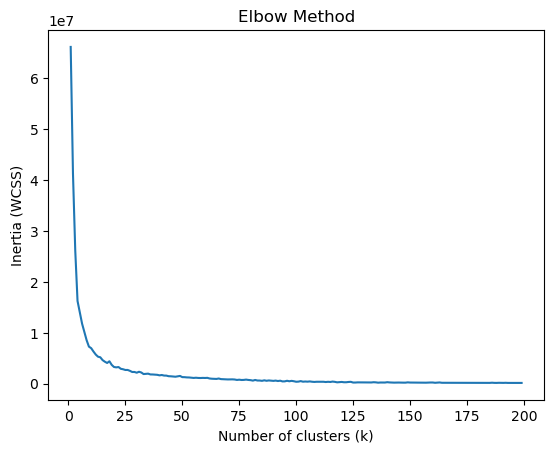

In [29]:
ks = range(1, len(inertias) + 1)

plt.plot(ks, inertias)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

In [89]:
#Choose k = 30 and max_iter = 30 based on graphs above
k = 30
max_iter = 30
centers, labels_kmeans, objectives = k_means(df[['x','y']], k=k, max_iter = max_iter)

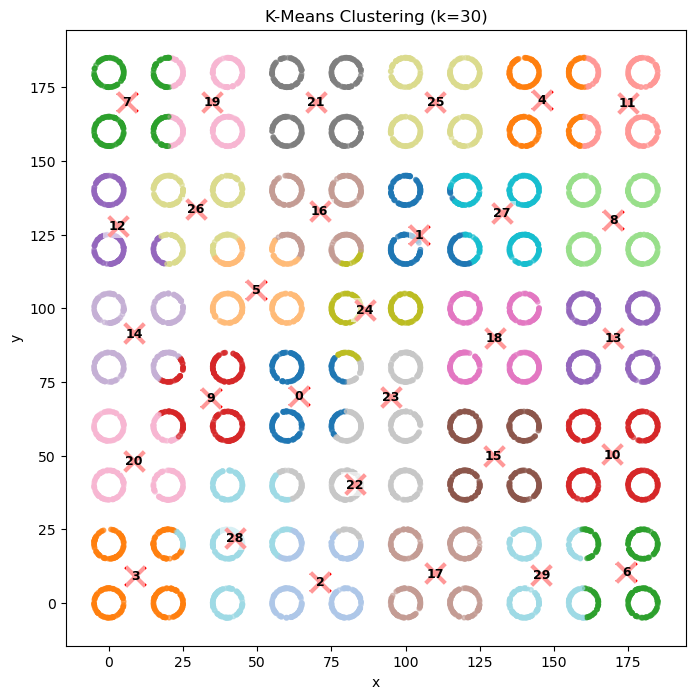

In [90]:
X = df[['x','y']].to_numpy()

plt.figure(figsize=(8,8))

# Scatter plot colored by cluster labels
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='tab20', s=10, alpha=0.6)

# Overlay centroids as large red X's
plt.scatter(centers[:,0], centers[:,1], c='red', marker='x', s=200, linewidths=3)


# Annotate each centroid with its cluster ID
for idx, (cx, cy) in enumerate(centers):
    plt.text(cx, cy, str(idx), fontsize=9, fontweight = "bold", color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title(f"K-Means Clustering (k={k})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [91]:
score = silhouette_score(X, labels_kmeans)
score

0.37316149328441495

In [38]:
def find_neighbors(X, idx, eps):
    dist = np.linalg.norm(X-X[idx], axis=1)
    return np.where(dist<=eps)[0]

def dbscan(X, minPts=4, eps=2):
    n = X.shape[0] #total number of datapoints

    #define labels for unvisited and noise
    unvisited = -2 
    noise = -1
    labels = np.full(n, unvisited, dtype=int)
    cluster_id = 0

    for i in range(n):

        if labels[i] != unvisited:
            continue #point was already processed into a cluster or as noise

        neighbors = find_neighbors(X, i, eps)

        # not a core point (enough to start a new cluster)
        if neighbors.size < minPts:
            labels[i] = noise
            continue

        cluster_id += 1
        labels[i] = cluster_id
        pts_to_check = [i for i in neighbors]

        while pts_to_check:
            j = pts_to_check.pop()
            
            if labels[j] == noise:
                labels[j] = cluster_id #non-core pts become borders of our cluster but cannot expand the cluster

            if labels[j] != unvisited:
                continue 
                
            labels[j] = cluster_id
            j_neighbors = find_neighbors(X, j, eps)
            
            if j_neighbors.size >= minPts:
                for nb in j_neighbors:
                    if labels[nb] in [unvisited, noise]:   
                        pts_to_check.append(nb)
    return labels     
        

In [50]:
minPts = [4,5,6,7,8]
def plot_elbow_DBSCAN(n_neighbors):
    k = n_neighbors
    nbrs = NearestNeighbors(n_neighbors = k).fit(X)
    distances, idx = nbrs.kneighbors(X)

    kdist = distances[:, -1]
    kdist_sorted = np.sort(kdist)[::-1]

    plt.figure(figsize=(6,4))
    plt.plot(kdist_sorted)
    plt.xlabel("Points (sorted)")
    plt.ylabel(f"{k}-NN distance")
    plt.title(f"k-distance elbow plot (minPts={k})")
    plt.grid(alpha=0.3)
    plt.show()

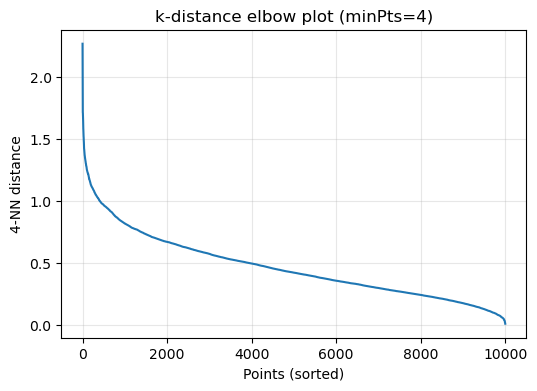

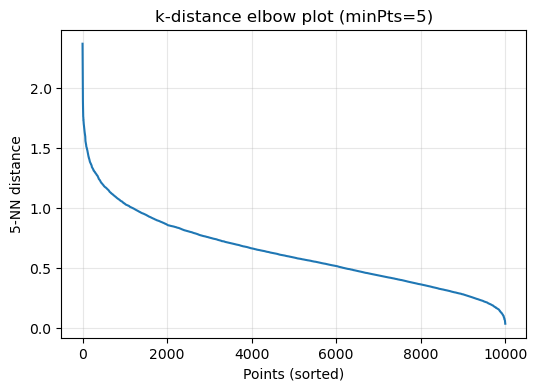

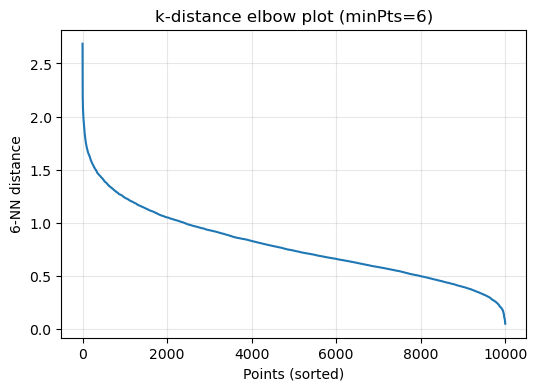

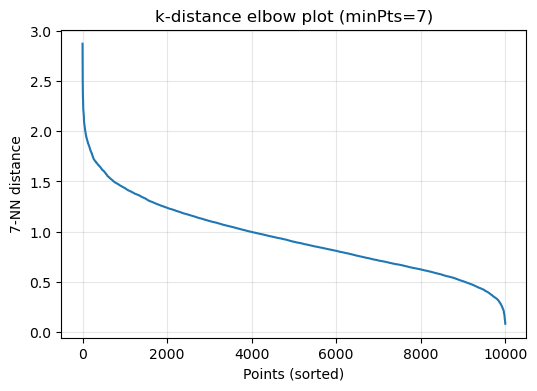

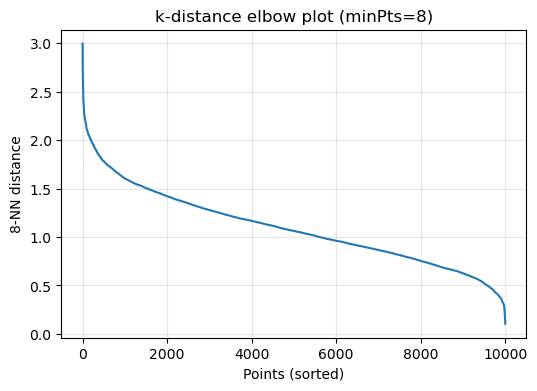

In [51]:
for minPt in minPts:
    plot_elbow_DBSCAN(minPt)

In [81]:
minpts_eps = {
    4: 1.0,
    5: 1.25,
    6: 1.5,
    7: 1.75,
    8: 1.75
}

for minPt, eps in minpts_eps.items():
    labels = dbscan(X, minPt, eps)
    print(f"Silhouette Score for minPts={minPt}: {(silhouette_score(X,labels))}")

Silhouette Score for minPts=8: 0.5287497876476058


In [92]:
minpts = 7
eps = 1.75
labels_dbscan = dbscan(X, minPts=minpts, eps=eps)

# unique labels
unique_labels = np.unique(labels)

# exclude noise (-1)
n_clusters = len(unique_labels[unique_labels != -1])
n_noise = np.sum(labels == -1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)

Clusters found: 114
Noise points: 3


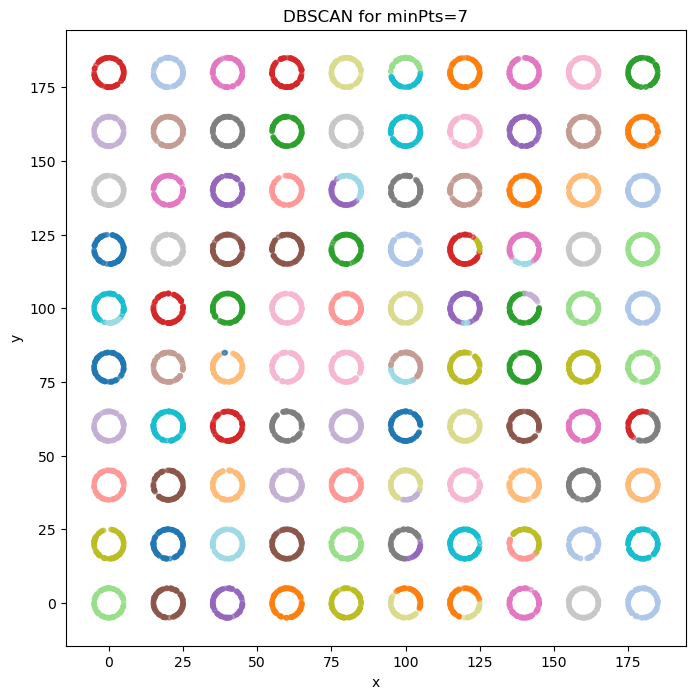

In [93]:
plt.figure(figsize=(8,8))

# Scatter plot colored by cluster labels
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab20', s=10, alpha=0.6)

plt.title(f"DBSCAN for minPts=7")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

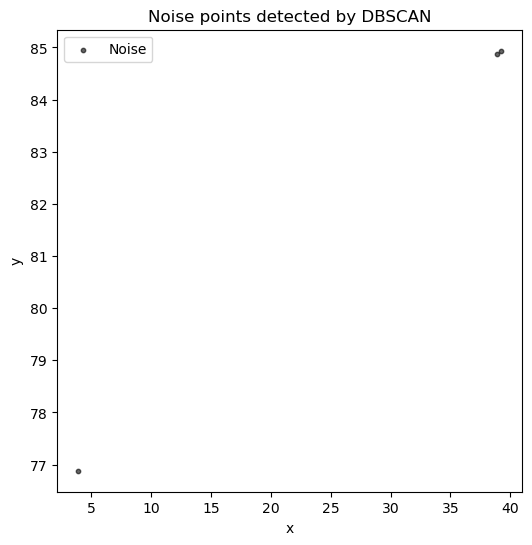

In [94]:
# Get noise points (labels == -1)
noise_points = X[labels == -1]

plt.figure(figsize=(6,6))

# plot noise points only
plt.scatter(noise_points[:,0], noise_points[:,1], c='black', s=10, alpha=0.6, label="Noise")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Noise points detected by DBSCAN")
plt.legend()
plt.show()

In [95]:
score = silhouette_score(X, labels)
score

0.5735444035286025